In [5]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached pydantic-1.8.2-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached PyYAML-6.0-cp39-cp39-win_amd64.whl (151 kB)
  Using cached phik-0.12.0-cp39-cp39-win_amd64.whl (659 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached ImageHash-4.2.1.tar.gz (812 kB)


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for htmlmin, since package 'wheel' is not installed.
Using legacy 'setup.py install' for imagehash, since package 'wheel' is not installed.
    Running setup.py install for imagehash: started
    Running setup.py install for imagehash: finished with status 'done'
    Running setup.py install for htmlmin: started
    Running setup.py install for htmlmin: finished with status 'done'


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)

In [10]:
profile.to_file('pandas_profiling.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
from sklearn.linear_model import LinearRegression

X = df[['TV']] # dataframe
y = df['Sales'] # series

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
model.coef_

array([0.05546477])

In [12]:
model.intercept_

6.974821488229891

In [13]:
y_pred=model.predict(X)

In [16]:
%matplotlib inline

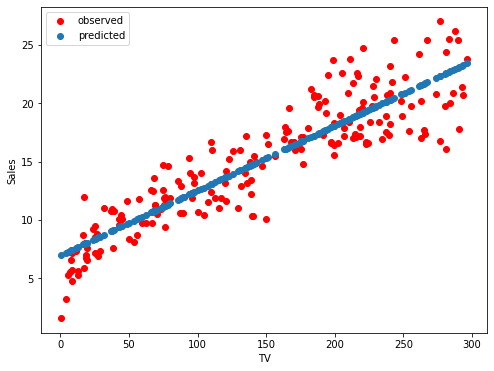

In [17]:
plt.figure(figsize=(8,6))
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(X, y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(X, y_pred, label='predicted')


plt.legend();

-----

# Some theory

> The regression sole purpose in life is to <b>find a curve that best fits the data points</b>. 

-----

There are two main **applications** for finding best lines between variables:

<u><b> Describe: </b></u>
- Use <b> regression </b> to determine the strength of the relationship between the variable you are interested in and the other variables. 

<u><b> Predict: </b></u>
- Use <b> regression </b> to predict values of new data points. 

------

<u><b> Degrees of freedom </b></u>

A regression line is one of the simplest models. We say it has <b>few degrees of freedom</b>. Namely, a linear regression has <b> two degrees of freedom - the slope and the intercept. </b>

<u><b> Slope:</b></u> The angular coefficient of the linear regression. The greater this number is, the more impact of that specific variable on the Y variable.

<u><b> Intercept:</b></u> The value of Y for which X equals 0.

$$y = a + b x$$

$a \rightarrow$ intercept

$b \rightarrow$ slope

# Measuring your error.

## Error terms: 

<u>1. Residuals</u>

$Y_{observed} - Y_{predicted}$

<u>2. Sum of Residuals</u>

$\sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})$

- This might cancel the errors.

<u>3. Sum of square of residuals</u>

$\sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})^2$

- Heavily penalize higher error value.
- Not robust to outliers.


Linear regression looks for optimizing the intercept and coefficients such that it minimizes the objective function. The objective function is a simple measure of error: 


## <u> Objective Function (Cost Function)</u> 

Minimize the objective function:
- Objective function for **Mean** Squared Error (MSE): $\frac{1}{n} \sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})^2$



Since it tries to make the **mean** error as small as possible, how do you think outliers affect the linear regression?

<b> Outlier greatly affect the regression </b>

In practice:

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['TV']]
y = df['Sales']

model.fit(X, y)

LinearRegression()

In [19]:
y_observed = df['Sales']
y_predicted = model.predict(X)

In [20]:
list(zip(y_observed, y_predicted))

[(22.1, 19.73726517327539),
 (10.4, 9.44300377412526),
 (12.0, 7.928815540306303),
 (16.5, 15.37773421436806),
 (17.9, 17.002851989126135),
 (7.2, 7.457364991315053),
 (11.8, 10.164045790229526),
 (13.2, 13.641686898670867),
 (4.8, 7.451818514268097),
 (15.6, 18.056682628047753),
 (12.6, 10.641042816267731),
 (17.4, 18.88310770804418),
 (9.2, 8.294883025405392),
 (13.7, 12.38263660901188),
 (19.0, 18.295181141066855),
 (22.4, 17.812637637981695),
 (12.5, 10.735332926065983),
 (24.4, 22.582607898363754),
 (11.3, 10.812983604723364),
 (14.6, 15.144782178395914),
 (18.0, 19.088327358781548),
 (17.5, 20.142157997703166),
 (5.6, 7.706956458428068),
 (20.5, 19.637428586430183),
 (9.7, 10.430276688483408),
 (17.0, 21.556509644676918),
 (15.0, 14.900737188329854),
 (20.9, 20.291912877970976),
 (18.9, 20.77445638105614),
 (10.5, 10.890634283380747),
 (21.4, 23.220452758763685),
 (11.9, 13.236794074243088),
 (13.2, 12.365997177871012),
 (17.4, 21.70626452494473),
 (11.9, 12.282800022166676),
 (1

In [21]:
residual_squared = []

for y_o, y_p in list(zip(y_observed, y_predicted)):
    residual = y_o - y_p
    residual_squared.append(residual ** 2)

In [22]:
np.max(residual_squared)
print(f'Max error {np.max(residual_squared)}, min error {np.min(residual_squared)}, mean error {np.mean(residual_squared)}')

Max error 41.52233366812448, min error 1.5890675338121314e-05, mean error 5.2177438977951285


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_observed, y_predicted)

5.2177438977951285

## Root Mean Squared Error (RMSE)
desvio médio quadrático ou erro quadrático médio

### interpreting the mean squared error

5.2 sales² $\rightarrow$ out of our variable scale

2.28 sales

The average mean error I will have in my prediction in sales is 2.28 if I use only the TV as my predictive variable.

In [25]:
# na média eu sei que errei tanto, o quadrado não dá o erro real
np.sqrt(mean_squared_error(y_observed, y_predicted))

2.2842381438447106

## Coefficient of Determination $R^2$

What is important to understand?

> $R^2$ is a measure of how much information of our Y-variable is explained by our X-variable.

<font size="5">

$R^2 = 1 - \frac{\sum_{i = 1}^{n}(y_{observed} - y_{predicted})^2}{\sum_{i = 1}^{n}(y_{observed} - y_{mean})^2}$
    
</font>

- Numerator: ~variance of model's prediction
- Denominator: ~variance



For example: if you measure your error considering your model and it result in 90. And you measure your error using only the mean you obtain 100, the R² will be:

$R² = 1 - \frac{90}{100} = 1 - 0.9 = 0.1$

This means that your model is 10% better than using only the average. This means that using the variable TV increased your performance by 10%

Moreover, remember that $(y_{obs} - y_{mean})^2$ is the variance. So it is also a measure of how much information that adding this variable brought to your model.

### In practice

- `r2_score`

- `model.score()`

In [26]:
from sklearn.metrics import r2_score

The `r2_score` method expects you to pass the `y_observed` (that comes from the real data) and the values you predicted, `y_predicted` (that comes from the `model.predict(X)` method).

In [27]:
y_observed

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [28]:
y_predicted

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199,
        7.45736499, 10.16404579, 13.6416869 ,  7.45181851, 18.05668263,
       10.64104282, 18.88310771,  8.29488303, 12.38263661, 18.29518114,
       17.81263764, 10.73533293, 22.5826079 , 10.8129836 , 15.14478218,
       19.08832736, 20.142158  ,  7.70695646, 19.63742859, 10.43027669,
       21.55650964, 14.90073719, 20.29191288, 20.77445638, 10.89063428,
       23.22045276, 13.23679407, 12.36599718, 21.70626452, 12.28280002,
       23.09843026, 21.77836873, 11.11803984,  9.3653531 , 19.62078916,
       18.20643751, 16.79208586, 23.2592781 , 18.4504825 ,  8.36698723,
       16.6867028 , 11.9500114 , 20.28081992, 19.57641734, 10.68541463,
       18.05668263, 12.54348444, 18.97739782, 17.10268858, 21.54541669,
       18.00676433,  7.37971431, 14.52912323, 18.6667951 , 18.66124863,
        9.94218671, 21.46776601, 20.24754106, 12.67105342, 14.2462529 ,
       10.80189065,  8.72196176, 14.70106401, 20.142158  , 18.99

In [29]:
type(y_observed)

pandas.core.series.Series

In [30]:
type(y_predicted)

numpy.ndarray

In [31]:
y_predicted.shape

(200,)

In [32]:
r2_score(y_observed, y_predicted)

0.8121757029987414

Also, you could use the model's  `model.score(X, y)` method.

In [33]:
model.score(X, y)

0.8121757029987414

## Using Newspaper

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


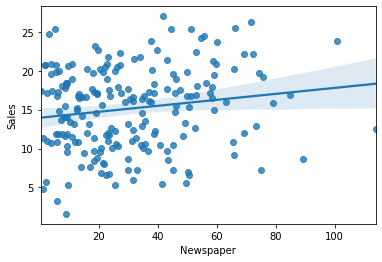

In [34]:
sns.regplot(df['Newspaper'], df['Sales']);

In [35]:
model = LinearRegression()

model.fit(df[['Newspaper']], df['Sales'])

model.score(df[['Newspaper']], df['Sales']) 

0.024951369862864836

In [36]:
model.coef_

array([0.038324])

----

# Multiple Linear Regression

Same thing, except that now we'll use more than 1 predictor variable

$$y = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n$$

In [37]:
X = df[['TV','Radio']]
y = df['Sales']

model.fit(X,y)

model.coef_ 

array([0.05444896, 0.10717457])

In [38]:
model.intercept_

4.63087946409777

In [39]:
model.score(X, y)

0.9025896186081139

In [40]:
np.sqrt(mean_squared_error(y, model.predict(X)))

1.6450083823140502

> Any number of variables can be used. It doesn't mean you should.

In [41]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [42]:
model.fit(X,y)

LinearRegression()

In [43]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [44]:
model.score(X, y)

0.9025912899684558

In [45]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


0.9025896186081139

In [46]:
X.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


In [47]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [48]:
pd.DataFrame({'coefs':model.coef_,'Columns':X.columns})

,coefs,Columns
0,0.054446,TV
1,0.107001,Radio
2,0.000336,Newspaper


In [49]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Standardization (Z-score)

Standardize a variables means: transform it into a variable that has **mean = 0** and **standard deviation = 1**. In this manner, all variables are scaled to the same scale!

$$X_{std} = \frac{X - \mu}{\sigma}$$

$\mu \rightarrow$ média

$\sigma \rightarrow$ desvio padrão

<br><br>
<b>Understanding:</b>

If $X_{std}$ > 0 $\rightarrow$ it means that that specific observation is <u>above average</u>

If $X_{std}$ < 0 $\rightarrow$ it means that that specific observation is <u>below average</u>

If $X_{std}$ = 0 $\rightarrow$ it means that that specific observation is <u>the average</u>

If $X_{std}$ = 1 $\rightarrow$ it means that that specific observation is <u>1 standard deviation above average</u>

If $X_{std}$ = -2 $\rightarrow$ it means that that specific observation is <u>2 standard deviations below average</u>


In [50]:
X_std = (X - X.mean())/X.std()

In [51]:
model.fit(X_std, y)

LinearRegression()

In [52]:
model.coef_

array([4.67440089, 1.58862682, 0.00731017])

In [53]:
list(zip(X['Radio'].head(), X_std['Radio'].head()))

[(37.8, 0.9790655909643112),
 (39.3, 1.0800974007088397),
 (45.9, 1.5246373635847659),
 (41.3, 1.2148064803682113),
 (10.8, -0.8395069844372034)]

In [54]:
list(zip(X['TV'].head(), X_std['TV'].head()))

[(230.1, 0.967424597376304),
 (44.5, -1.1943790359264321),
 (17.2, -1.5123598505232247),
 (151.5, 0.05191939491081341),
 (180.8, 0.39319550728026487)]

In [55]:
# good way to Standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X) 

StandardScaler()

In [56]:
scaler.transform(X) 

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [57]:
X_std = scaler.transform(X) 
X_std

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [58]:
model = LinearRegression()

model.fit(X_std, y)

LinearRegression()

In [59]:
model.coef_

array([4.66270025, 1.58465027, 0.00729187])

In [60]:
model.intercept_

15.130500000000001

In [61]:
# the mean error I would have in sales is:
np.sqrt(mean_squared_error(y_observed, model.predict(X_std)))

1.6449942697855562

In [62]:
X_std

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [63]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [64]:
model.score(X_std, y)

0.9025912899684558